# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [65]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import pathlib as path
import numpy as np

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(study_results,mouse_metadata, on='Mouse ID')

# Display the data table for preview
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [14]:
# Checking the number of mice.
mice_total = len(mouse_study['Mouse ID'].unique())
mice_total

249

In [15]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.


In [82]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice = mouse_study[mouse_study.duplicated(subset=['Mouse ID','Timepoint'],keep='first')]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [83]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = mouse_study.drop_duplicates(subset=['Mouse ID','Timepoint'],keep='first')
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [167]:
# Checking the number of mice in the clean DataFrame.
mice_total2 = len(clean_data['Mouse ID'].unique())
mice_total2

249

## Summary Statistics

In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
variance = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
std_dev = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
# Assemble the resulting series into a single summary DataFrame.
clean_data_df = pd.DataFrame({'Mean Tumor Volume':mean,'Median Tumor Volume':median,'Tumor Volume Variance':variance,'Tumor Volume Std. Dev.':std_dev

})
clean_data_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.393463,50.909965,43.138803,6.568014
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


In [35]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean2='mean',
    median2='median',
    variance2='var',
    std_dev2='std',
    sem2='sem'
).reset_index()
summary_statistics.set_index(['Drug Regimen'])

,mean2,median2,variance2,std_dev2,sem2
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

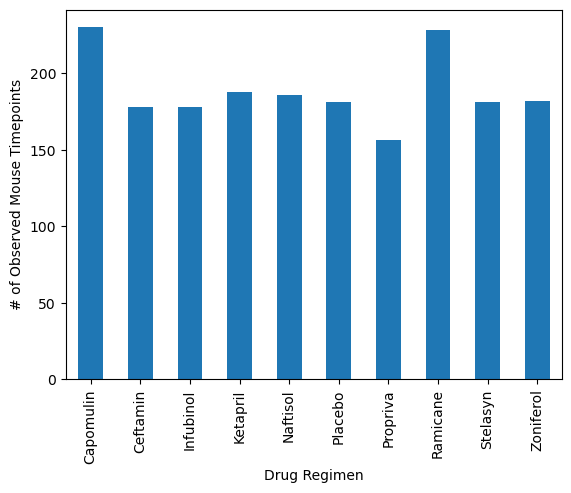

In [60]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

regimen_counts = clean_data.groupby('Drug Regimen').size()

regimen_counts_graph = regimen_counts.plot(kind='bar')
regimen_counts_graph.set_ylabel('# of Observed Mouse Timepoints')

(array([-2.,  0.,  2.,  4.,  6.,  8., 10.]),
 [Text(-2.0, 0, '−2'),
  Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10')])

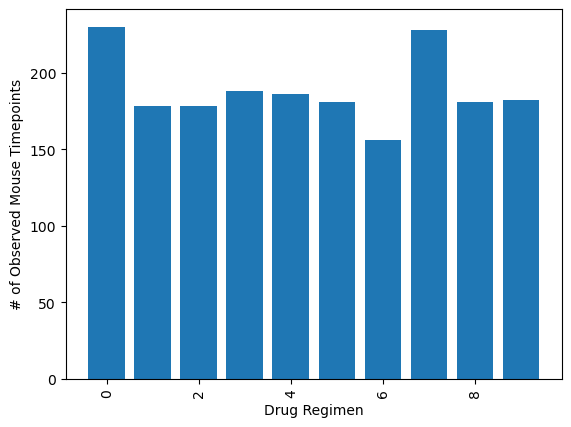

In [68]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts2 = np.arange(len(clean_data['Drug Regimen'].unique()))
plt.bar(regimen_counts2,regimen_counts)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation =90)

<Axes: ylabel='count'>

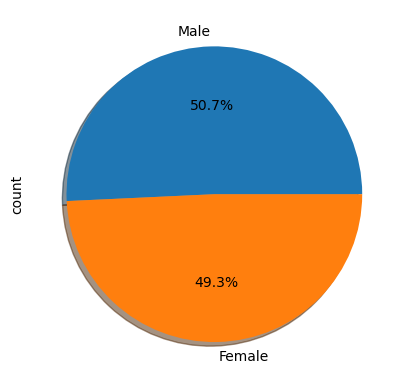

In [165]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_counts = clean_data['Sex'].value_counts()

# Make the pie chart
gender_counts.plot(kind='pie',autopct='%1.1f%%', shadow=True, startangle=360)

([<matplotlib.patches.Wedge at 0x2075ca01f10>,
 [Text(-0.025622895044835958, 1.0997015355311284, 'Male'),
  Text(0.02562279208334628, -1.099701537930112, 'Female')],
 [Text(-0.013976124569910521, 0.5998372011987972, '50.7%'),
  Text(0.013976068409097969, -0.5998372025073339, '49.3%')])

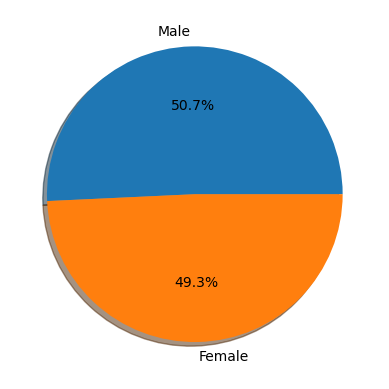

In [166]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender

gender_counts = clean_data['Sex'].value_counts()
# Make the pie chart
plt.pie(gender_counts,labels=gender_counts.index,autopct='%1.1f%%', startangle=360, shadow=True)

## Quartiles, Outliers and Boxplots

In [92]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = clean_data.groupby('Mouse ID').max()['Timepoint'].reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_cd = pd.merge(greatest_timepoint,clean_data,on=['Mouse ID','Timepoint'])


In [99]:
# Put treatments into a list for for loop (and later for plot labels)

treatment = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume2 = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for x in treatment:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = merged_cd[merged_cd['Drug Regimen'] == x]['Tumor Volume (mm3)']

    # add subset
    tumor_volume2.append(treatment_data)

    # Determine outliers using upper and lower bounds
    q1 = treatment_data.quantile(0.25)
    q3 = treatment_data.quantile(0.75)
    iqr = q3 - q1

    low = q1 - 1.5 * iqr
    up = q3 + 1.5 * iqr

    outliers = treatment_data[(treatment_data < low)|(treatment_data>up)]
    print(f'{x} potential outliers: {outliers.tolist()}')
 

Capomulin potential outliers: []
Ramicane potential outliers: []
Infubinol potential outliers: [36.3213458]
Ceftamin potential outliers: []


{'whiskers': [<matplotlib.lines.Line2D at 0x20758564c80>,
 'caps': [<matplotlib.lines.Line2D at 0x207585651f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20758564b30>,
 'medians': [<matplotlib.lines.Line2D at 0x20758565790>,
 'fliers': [<matplotlib.lines.Line2D at 0x20758565a90>,
 'means': []}

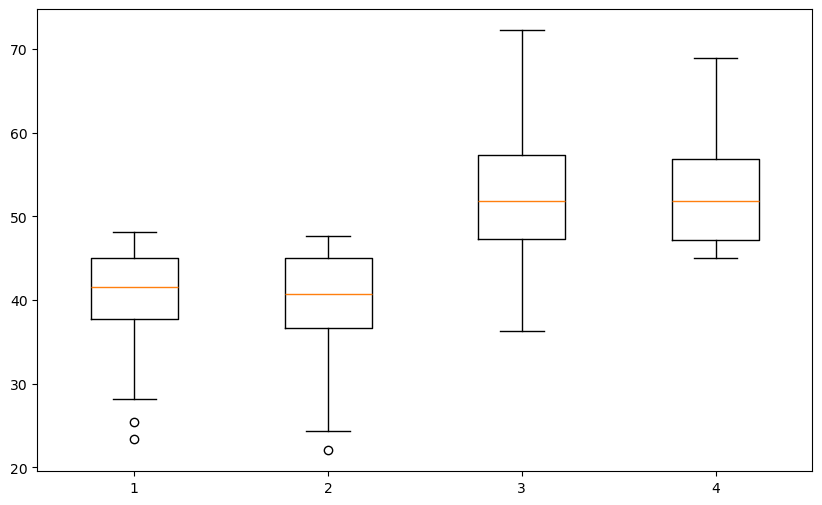

In [104]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(10,6))
treatment_groups = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
plt.boxplot(treatment_groups[treatment])

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

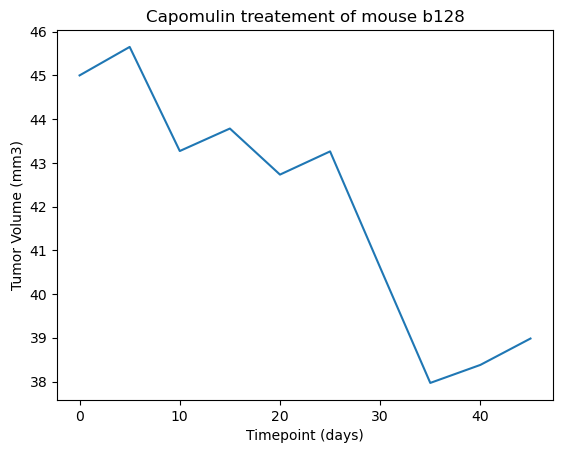

In [112]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin = clean_data[clean_data['Mouse ID'] == 'b128']
timepoint = capomulin['Timepoint']
tumor_volume3 = capomulin['Tumor Volume (mm3)']
plt.plot(timepoint,tumor_volume3)
plt.title('Capomulin treatement of mouse b128')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, ' Avg Tumor Volume (mm3)')

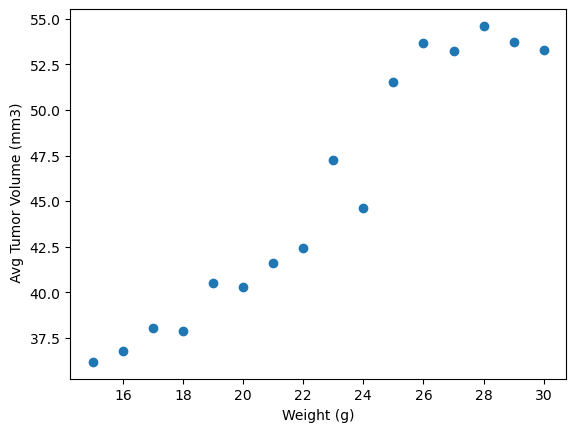

In [161]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin2 = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

avg = clean_data.groupby('Weight (g)')['Tumor Volume (mm3)'].mean().reset_index()
plt.scatter(avg['Weight (g)'],avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel(' Avg Tumor Volume (mm3)')

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


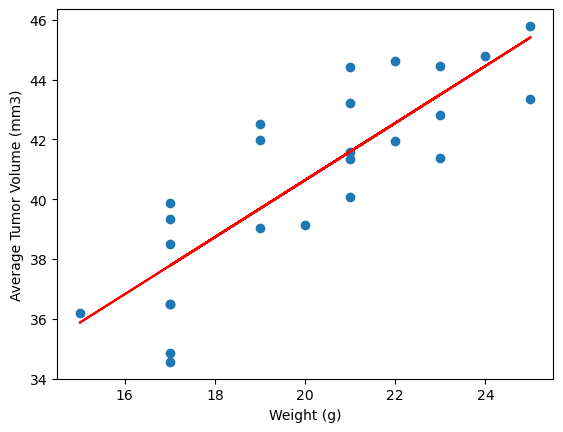

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
